# Caracterização meteorológica da área de estudo
Autor: José Henrique Hess \
Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:
1. Meteorologia de superfície
2. Meteorologia upperair ou sondagem/perfil da atmosfera
3. Superfície, razão de Bowen e Rugosidade

## Meteorologia de superfície
Analisaremos os dados de metar (estação meteorológica em aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR \
Faça seu login e colete o dado para o período de 01/01/2023 a 01/01/2024. \
Os dados estarão na pasta de tabelas/meteoSuperficie com a nomenclatura metar.csv

In [52]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import locale
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter

In [301]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath + '\\tabelas\\meteoSuperficie'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\joseh\Documents\GitHub\ENS5173_202401
C:\Users\joseh\Documents\GitHub\ENS5173_202401\tabelas\meteoSuperficie
['metar_2021.csv', 'metar_2022.csv', 'metar_2023.csv']


In [54]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    if file == 'metar_2023.csv':
        metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie).reset_index()

print(metSuperficie)

      index  day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0         0    1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1         1    1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2         2    1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3         3    1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4         4    1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...     ...  ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.6

In [55]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year','month','day','hour']])
print(metSuperficie['datetime'])

#Definindo a coluna de datetime como índice de matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,index,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,0,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,2,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,3,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,4,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,8753,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,8754,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,8755,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


In [56]:
# Criando função de formatar eixo y

def formatareixoy():
    formatter = ScalarFormatter(useOffset=False)  # Criar um ScalarFormatter para evitar offsets como 1.009e3
    formatter.set_scientific(False)  # Desativar notação científica
    return(formatter)

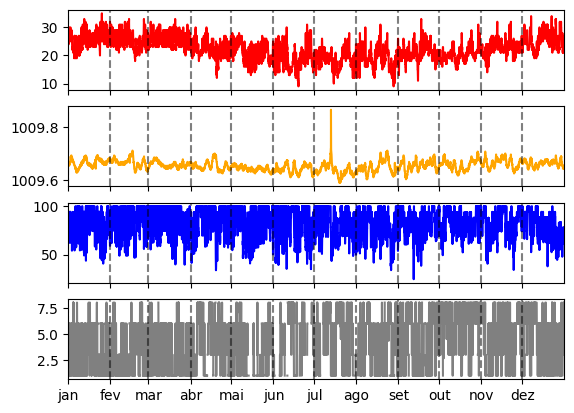

In [57]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt

# Configurando o locale para português
locale.setlocale(locale.LC_TIME, 'pt_BR.utf8')

lista_colunas = ['temp', 'p', 'relh', 'cco'] # Lista com nome das colunas de temperatura, pressão atmosférica, umidade relativa e nuvens.
lista_cores = ['red', 'orange', 'blue', 'gray']

fig,ax = plt.subplots(4,sharex=True)

for ii in range(4):
    
    ax[ii].plot(metSuperficie['datetime'],metSuperficie[lista_colunas[ii]], color = lista_cores[ii])
    ax[ii].set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31 23:00:00'))

    # Adicionando linha para cada mês
    for date in pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS'):
        ax[ii].axvline(x=date, color='black', linestyle='--', alpha=0.5)
        
    ax[ii].yaxis.set_major_formatter(formatareixoy())  # Aplicar o formatter ao eixo y

# Configurando o formato do eixo x para mostrar os meses abreviados
ax[ii].xaxis.set_major_locator(mdates.MonthLocator())  # Coloca um marcador em cada mês
ax[ii].xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Mostra os três primeiros caracteres do mês
    
ax[ii].tick_params()

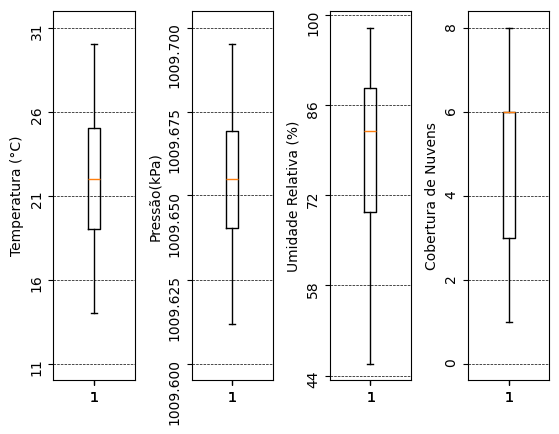

In [72]:
# Fazendo boxplot das variáveis

# Removendo valores acima do percentil 95°
import numpy as np

fig,ax = plt.subplots(1,4,sharex=True)

temp99 = np.percentile(metSuperficie['temp'],99)
temp01 = np.percentile(metSuperficie['temp'],1)
pres99 = np.percentile(metSuperficie['p'],99)
pres01 = np.percentile(metSuperficie['p'],1)
umid99 = np.percentile(metSuperficie['relh'],99)
umid01 = np.percentile(metSuperficie['relh'],1)
cco100 = 8.001
cco00 = 0.999

lista_percentis = [temp99,temp01,pres99,pres01,umid99,umid01,cco100,cco00]
lista_eixoy = ['Temperatura (°C)', 'Pressão(kPa)', 'Umidade Relativa (%)', 'Cobertura de Nuvens']

for ii in range(4):
    ax[ii].boxplot(metSuperficie[lista_colunas[ii]].dropna()[(metSuperficie[lista_colunas[ii]]<lista_percentis[ii*2]) 
                                                     & (metSuperficie[lista_colunas[ii]]>lista_percentis[ii*2+1])])

    maximo = round(lista_percentis[ii*2],1) # Valor máximo da variável arredondado em uma casa decimal      
    minimo = round(lista_percentis[ii*2+1],1) # Valor mínimo da variável arredondado em uma casa decimal
    eixo_y = []
    
    for a in range(0,5):
        b = 0
        while b == 0:
            if (maximo - minimo) % 4 == 0 or (maximo-minimo) < 1:
                ax[ii].axhline(a*(maximo-minimo)/4+minimo, color='black', linestyle='--', linewidth=0.5)
                eixo_y.append(a*(maximo-minimo)/4+minimo)
                b = 1
            else:
                minimo = int(minimo) - 1

    ax[ii].yaxis.set_major_formatter(formatareixoy())  # Aplicar o formatter ao eixo y
    
    ax[ii].set_yticks(eixo_y)
    
    for tick in ax[ii].get_yticklabels():
        tick.set_rotation(90)

    ax[ii].set_ylabel(lista_eixoy[ii])
        
# Criando espaçamento entre os subgráficos
plt.subplots_adjust(wspace=0.7)


([<matplotlib.axis.XTick at 0x2cdcb1b6150>,
 [Text(1, 0, 'jan'),
  Text(2, 0, 'fev'),
  Text(3, 0, 'mar'),
  Text(4, 0, 'abr'),
  Text(5, 0, 'mai'),
  Text(6, 0, 'jun'),
  Text(7, 0, 'jul'),
  Text(8, 0, 'ago'),
  Text(9, 0, 'set'),
  Text(10, 0, 'out'),
  Text(11, 0, 'nov'),
  Text(12, 0, 'dez')])

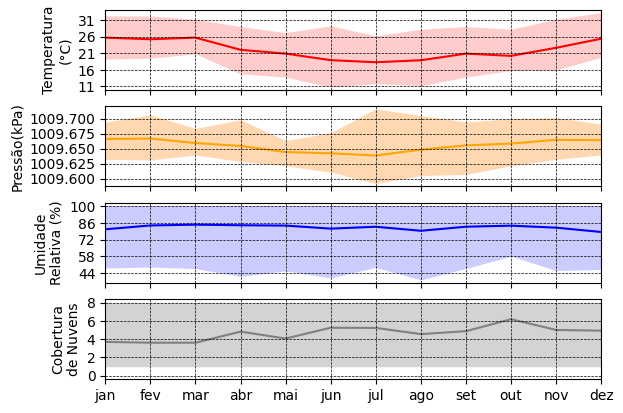

In [76]:
# Estatísticas dos dados

#metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.groupby('month').mean()
min_mensal = metSuperficie.groupby('month').quantile(0.01)
max_mensal = metSuperficie.groupby('month').quantile(0.99)

#print(media_mensal)

lista_cores_sombra = ['#FFCCCC', '#FFD8B1', '#CCCCFF', '#D3D3D3']
lista_eixoy2 = ['Temperatura\n(°C)', 'Pressão(kPa)', 'Umidade\nRelativa (%)', 'Cobertura\nde Nuvens']


# Plotando figura após fazer a média mensal
fig,ax = plt.subplots(4,sharex=True)

for ii in range(4):
    
    ax[ii].plot(media_mensal.index,media_mensal[lista_colunas[ii]], color = lista_cores[ii])
    
    ax[ii].fill_between(media_mensal.index, min_mensal[lista_colunas[ii]], max_mensal[lista_colunas[ii]], color = lista_cores_sombra[ii])

    for a in range(1,13):
        ax[ii].axvline(x=a, color='black', linestyle='--', linewidth=0.5)
        
    ax[ii].set_xlim(1,12)

    maximo = round(metSuperficie[lista_colunas[ii]].quantile(0.99),1) # Valor máximo da variável arredondado em uma casa decimal      
    minimo = round(metSuperficie[lista_colunas[ii]].quantile(0.01),1) # Valor mínimo da variável arredondado em uma casa decimal  
    
    eixo_y = []
    
    for a in range(0,5):
        b = 0
        while b == 0:
            if (maximo - minimo) % 4 == 0 or (maximo-minimo) < 1:
                ax[ii].axhline(a*(maximo-minimo)/4+minimo, color='black', linestyle='--', linewidth=0.5)
                eixo_y.append(a*(maximo-minimo)/4+minimo)
                b = 1
            else:
                minimo = int(minimo) - 1
    
    ax[ii].set_yticks(eixo_y)

    # Desativando a notação científica e configurando o uso de ScalarFormatter para mais controle
    ax[ii].yaxis.set_major_formatter(formatareixoy())  # Aplicar o formatter ao eixo y

    ax[ii].set_ylabel(lista_eixoy2[ii])

# Configurando as etiquetas do eixo x para serem os meses
plt.xticks(range(1, 13), ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez'])


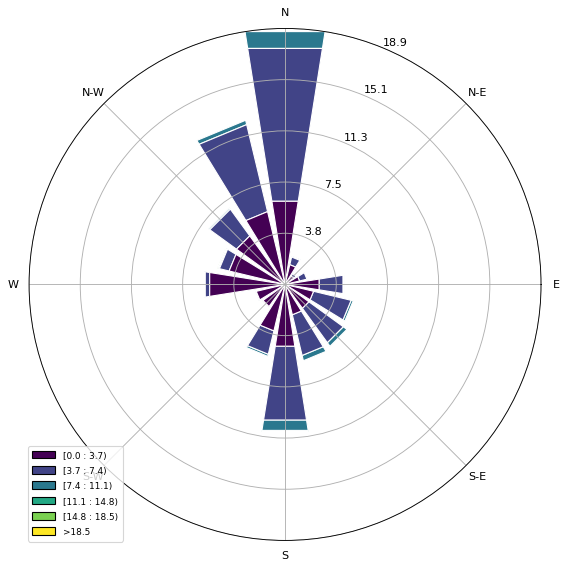

In [81]:
# Criando minha rosa dos ventos

from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'],metSuperficie['ws'],normed=True, opening=0.8, edgecolor="white") # Primeiro direção do vento, depois velocidade do vento
ax.set_legend()


# Análise upperair/sondagem/perfil da atmosfera

Análise do perfil de temperatura. Analise o perfil de temperatura da estação de monitoramento no aeroporto de Florianópolis utilizando o pacote Siphon do Python. Analise os dados de 0 e 12 horas durante 10 dias, sendo 5 no verão e 5 no inverno. Determine os pontos de inversão e possível altura da camada limite. Avalie a evolução da camada limite ao longo do dia e entre as estações do ano.

In [282]:
from datetime import datetime

#from metpy.units import units

from siphon.simplewebservice.wyoming import WyomingUpperAir

import random
from datetime import datetime, timedelta

# Definindo as datas de início e fim do verão e do inverno no Brasil
verao_inicio = datetime(2022, 12, 21)
verao_final = datetime(2023, 3, 20)
inverno_inicio = datetime(2023, 6, 21)
inverno_final = datetime(2023, 9, 22)
dias_verao = verao_final - verao_inicio
dias_inverno = inverno_final - inverno_inicio
lista_verao = []
lista_inverno = []

for a in range (5): # Selecionando 5 dias aleatórios para cada estação
    dia_aleatorio_verao = random.randint(0, dias_verao.days)
    dia_aleatorio_inverno = random.randint(0, dias_inverno.days)
    for b in range(2): # Selecionando meia noite e meio dia
        data_verao = verao_inicio + timedelta(days = dia_aleatorio_verao,hours=b*12)
        data_inverno = inverno_inicio + timedelta(days = dia_aleatorio_inverno, hours=b*12)
        if data_verao.year == 2022: # Transformar 2022 para 2023
            data_verao = data_verao + timedelta(days = 365)
        lista_verao.append(data_verao)
        lista_inverno.append(data_inverno)

# local da análise
station = 'SBFL'

dicionario_verao = {} # Criando dicionário para armazenar os dataframes do verão
dicionario_inverno = {} # Criando dicionário para armazenar os dataframes do inverno

for i in range(10): # Adicionando os dataframes de verao e inverno a cada dicionario
    df_verao = WyomingUpperAir.request_data(lista_verao[i],station)
    df_inverno = WyomingUpperAir.request_data(lista_inverno[i],station)
    dicionario_verao[str(lista_verao[i])] = df_verao
    dicionario_inverno[str(lista_inverno[i])] = df_inverno

# Imprimir os dicionarios
print(dicionario_verao)
print(dicionario_inverno)

# Obtendo uma lista das chaves do dicionário
datas_verao = list(dicionario_verao.keys())
datas_inverno = list(dicionario_inverno.keys())

{'2023-12-24 00:00:00':     pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1010.0       5         25.8      17.8      200.0    5.0   1.710101   
1     1004.0      59         26.8      17.8      194.0    7.0   1.693453   
2     1000.0      95         26.6      17.6      190.0    8.0   1.389185   
3      955.0     501         24.8      12.8      181.0    9.0   0.157072   
4      925.0     781         22.6      12.6      175.0    9.0  -0.784402   
..       ...     ...          ...       ...        ...    ...        ...   
78      20.4   26382        -52.3     -87.3       97.0   27.0 -26.798746   
79      20.0   26510        -52.1     -87.1      105.0   30.0 -28.977775   
80      18.0   27200        -49.8     -86.1       90.0   34.0 -34.000000   
81      16.0   27971        -47.2     -84.9      100.0   23.0 -22.650578   
82      15.6   28137        -46.7     -84.7        NaN    NaN        NaN   

          v_wind station  station_number       time  latitude  

C:\Users\joseh\AppData\Local\Temp\ipykernel_30136\4063979165.py:22: RuntimeWarning: invalid value encountered in divide
  dTdZ = 100*(deltaT/deltaZ) # A cada 100 m


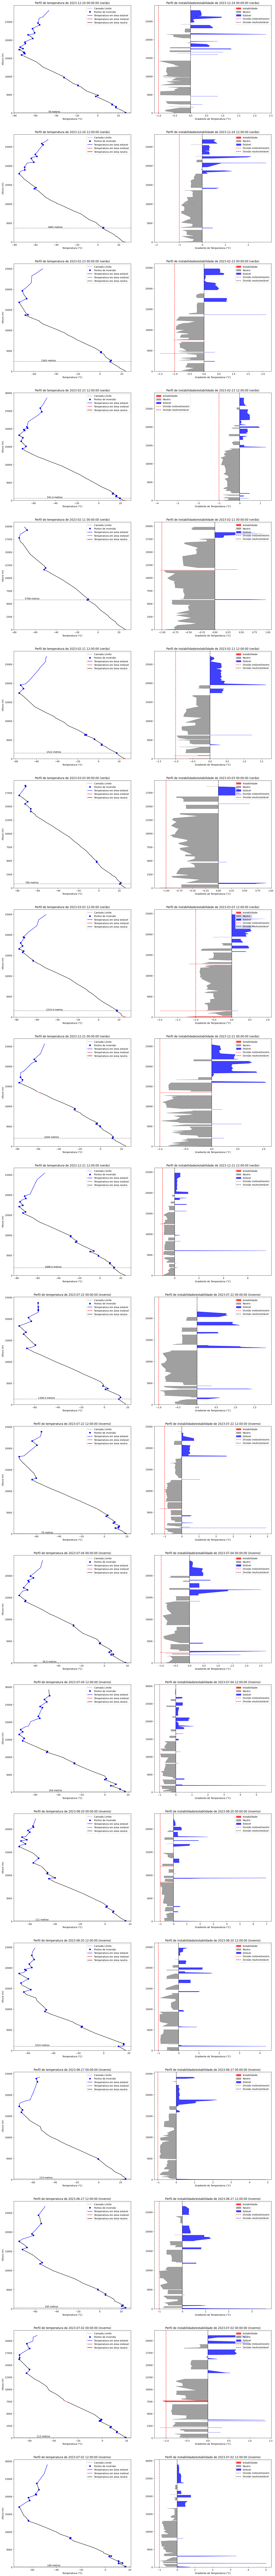

In [283]:
# Fazendo figura do perfil de temperatura
fig,ax = plt.subplots(20,2,figsize=(20, 200))

lista_datas = datas_verao+datas_inverno
lista_camadas = []

for ii in range(20):
    
    if ii <10:
        dic = dicionario_verao[str(lista_datas[ii])]
        ax[ii,0].set_title('Perfil de temperatura de ' + str(lista_datas[ii]) + ' (verão)')
        ax[ii,1].set_title('Perfil de instabilidade/estabilidade de ' + str(lista_datas[ii]) + ' (verão)')
    else:
        dic = dicionario_inverno[str(lista_datas[ii])]
        ax[ii,0].set_title('Perfil de temperatura de ' + str(lista_datas[ii]) + ' (inverno)')
        ax[ii,1].set_title('Perfil de instabilidade/estabilidade de ' + str(lista_datas[ii]) + ' (inverno)')
    
    # Calcular gradiente de temperatura
    deltaT = np.diff(dic['temperature'])
    deltaZ = np.diff(dic['height'])
    
    dTdZ = 100*(deltaT/deltaZ) # A cada 100 m

    camada_limite = -999

    for a in range(len(dTdZ)):
        if dTdZ[a] < -1: # Instável
            color = 'red'
        elif dTdZ[a] >= 0: # Estável
            color = 'blue'
            #ax[ii,1].fill_betweenx(dic['height'][:-1], dTdZ, color='blue', alpha=0.2, label='Instabilidade')
        else: # Neutra
            color = 'black'
            #ax[ii,1].fill_betweenx(dic['height'][:-1], dTdZ, color='black', alpha=0.2, label='Instabilidade')
        
        ax[ii,0].plot(dic['temperature'][a:a+2],dic['height'][a:a+2], color = color)

        # Verificar inversão e adiciona bolinha
        if a < len(dTdZ)-1:
            if (dTdZ[a] < 0 and dTdZ[a+1] >= 0) or (dTdZ[a] >= 0 and dTdZ[a+1] < 0):
                ax[ii, 0].plot(dic['temperature'][a+1], dic['height'][a+1], 'o', color='blue')      
                if camada_limite == -999:
                    camada_limite = dic['height'][a+1]
                    lista_camadas.append(camada_limite)

    # Adicionando camada limite
    ax[ii,0].axhline(y=camada_limite, color='gray', linestyle='--', label='Camada Limite')
    ax[ii,0].text(dic['temperature'][a], camada_limite + 100, f'{camada_limite} metros', color='black', fontsize=10)
    
    ax[ii,0].set_ylabel('Altura (m)')
    ax[ii,0].set_xlabel('Temperatura (°C)')
    ax[ii,1].set_xlabel('Gradiente de Temperatura (°C)')
    
    # Criando perfil de análise de instabilidade/neutralidade/estabilidade

    ax[ii,1].fill_betweenx(dic['height'][:-1], dTdZ, where = (dTdZ < -1), color='red', alpha=0.75, label='Instabilidade')
    ax[ii,1].fill_betweenx(dic['height'][:-1], dTdZ, where = ((dTdZ >= -1) & (dTdZ < 0)), color='gray', alpha=0.75, label='Neutro')
    ax[ii,1].fill_betweenx(dic['height'][:-1], dTdZ, where = (dTdZ >= 0), color='blue', alpha=0.75, label='Estável')

    ax[ii,1].axvline(x=-1, color='red', linestyle='--', label='Divisão instável/neutro') # Divisão instável/neutro
    ax[ii,1].axvline(x=0, color='black', linestyle='--', label='Divisão neutro/estável') # Divisão instável/neutro

    # Estabelecendo 0 como ponto de início do eixo y
    ax[ii,0].set_ylim(bottom=0) 
    ax[ii,1].set_ylim(bottom=0)
    
    # Criando legenda

    #Criando falso label de temperatura e de ponto de inversão para adicionar na legenda
    ax[ii, 0].plot(-1, -200, 'o', color='blue',label='Pontos de inversão') 
    ax[ii,0].plot([-20, -20], [-20, -20], color =  'blue', label = 'Temperatura em área estável')
    ax[ii,0].plot([-20, -20], [-20, -20], color =  'red', label = 'Temperatura em área instável')
    ax[ii,0].plot([-20, -20], [-20, -20], color =  'black', label = 'Temperatura em área neutra')
    
    ax[ii,0].legend()
    ax[ii,1].legend()


In [293]:
# Avaliação das camadas limites entre meia noite e meio dia, e entre verão e inverno

lista_datas2 = []
lista_camada_madrugada = []
lista_camada_meiodia = []

for i in range(10):
    data = datetime.strptime(lista_datas[i*2], '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')    
    data = str(data)
    lista_datas2.append(data)
    lista_camada_madrugada.append(lista_camadas[i*2])
    lista_camada_meiodia.append(lista_camadas[i*2+1])

lista_camada_madrugada_verao = []
lista_camada_madrugada_inverno = []
lista_camada_meiodia_verao = []
lista_camada_meiodia_inverno = []
lista_datas_verao = []
lista_datas_inverno = []

for i in range(10):
    if i < 5:
        lista_datas_verao.append(lista_datas2[i])
        lista_camada_madrugada_verao.append(lista_camada_madrugada[i])
        lista_camada_meiodia_verao.append(lista_camada_meiodia[i])
    else:
        lista_datas_inverno.append(lista_datas2[i])
        lista_camada_madrugada_inverno.append(lista_camada_madrugada[i])
        lista_camada_meiodia_inverno.append(lista_camada_meiodia[i])

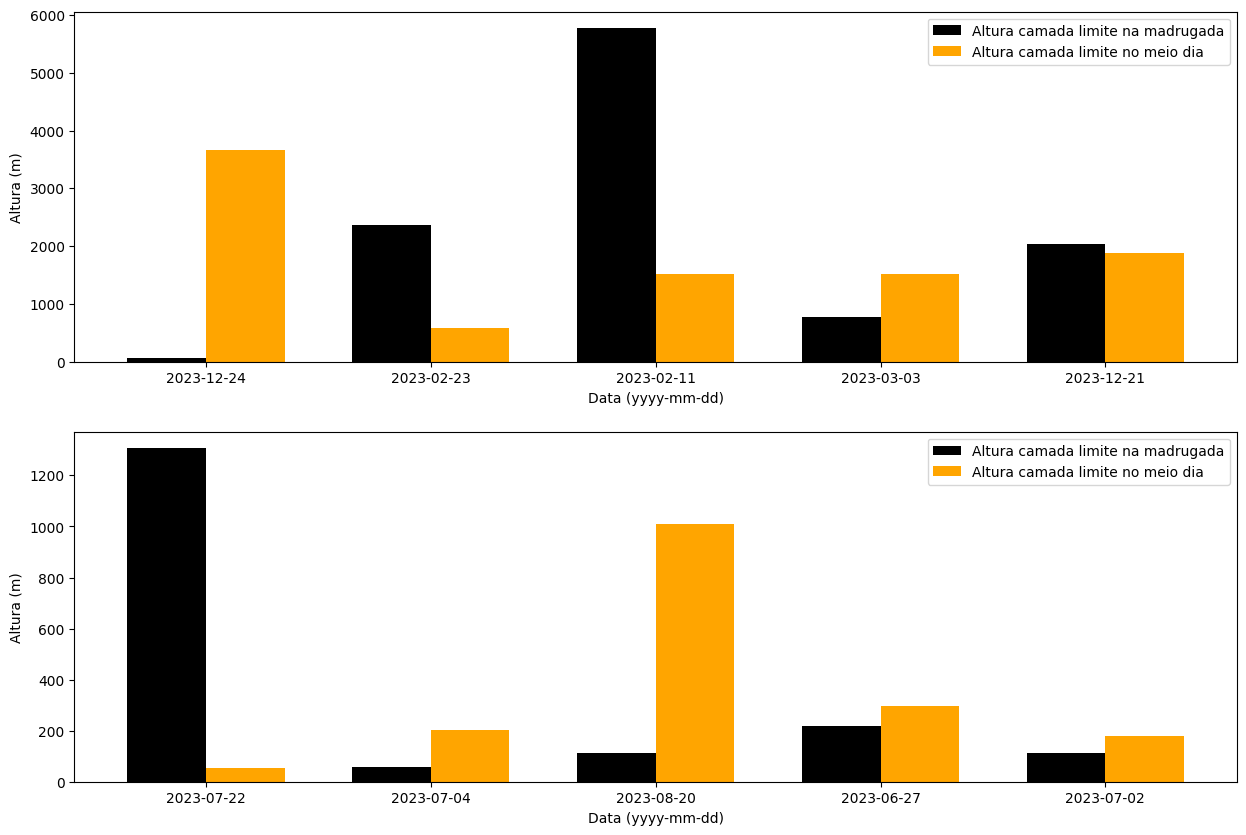

In [299]:
# Posições das barras no eixo x
x = np.arange(len(lista_datas_verao))

# Largura das barras
largura = 0.35

# Criação do gráfico
fig, ax = plt.subplots(2,1,figsize=(15,10))

lista_madrugada = [lista_camada_madrugada_verao,lista_camada_madrugada_inverno]
lista_meiodia = [lista_camada_meiodia_verao,lista_camada_meiodia_inverno]
lista_estacao = [lista_datas_verao, lista_datas_inverno]

for i in range(2):
    barras1 = ax[i].bar(x - largura/2, lista_madrugada[i], largura, label='Altura camada limite na madrugada',color = 'black')
    barras2 = ax[i].bar(x + largura/2, lista_meiodia[i], largura, label='Altura camada limite no meio dia',color = 'orange')
    
    # Adiciona os nomes às posições do eixo x
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(lista_estacao[i])
    
    # Adiciona legendas e rótulos
    ax[i].set_ylabel('Altura (m)')
    ax[i].set_xlabel('Data (yyyy-mm-dd)')
    ax[i].legend()



# EZ-AERMET

Execute o EZ-AERMET e  avalie a altura da camada limite e turbulência em 2023. Use os dados de superfície e sondagem para executar o software. Faça figuras e analise as condições meteorológicas e sua potencial influência na qualidade do ar.  Analise também a superficie do local de estudo utilizando o output da plataforma EZ-AERMET. Verifique os valores de albedo, razão de Bowen e rugosidade para cada quadrante do vento. Faça uma figura com o recorte feito pela plataforma, utilizando uma imagem de fundo de um satélite.

Text(0.5, 0, 'Data de 2023 (horas)')

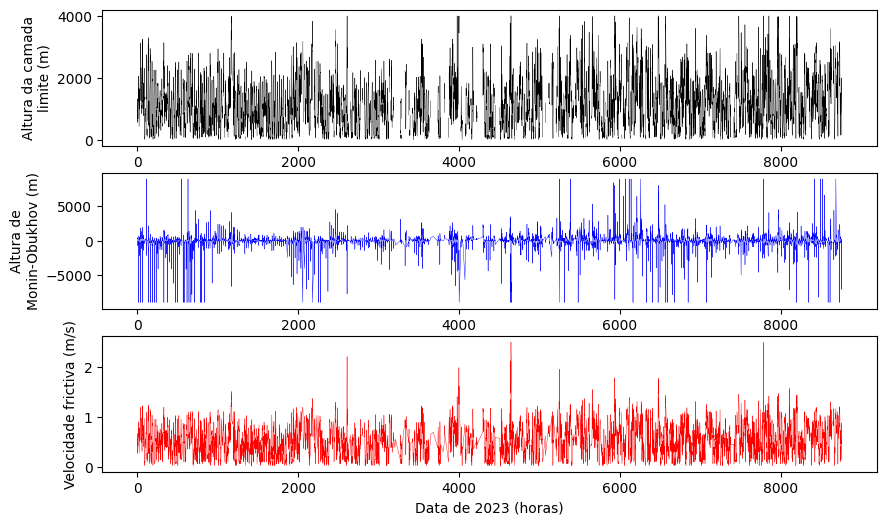

In [385]:
caminho= rootPath+'\\dados\\EZ_AERMOD_josehenriquehess_2024-05-24'

df_ezaermet = pd.read_csv(caminho+'\\METEO.csv')

# Renomeando as colunas
df_ezaermet.columns = [
    "ano", "mes", "dia", "dia juliano", "hora", "calor sensível",
    "surface friction velocity", "convective velocity scale",
    "potential temperature", "convectively-driven mixing height",
    "mechanically-driven mixing height", "Monin-Obukhov length",
    "rugosidade", "bowen", "albedo", "velocidade de vento",
    "direcao de vento", "anenometro", "temperatura",
    "medida de medida da temperatura", "codigo de precipitacao",
    "quantidade de precipitacao", "umidade relativa", "pressao (mb)",
    "cobertura de nuvens", "velocidade vento", "cobertura de nuvem"
]

#print(df_ezaermet)

# Função auxiliar para encontrar o maior valor, ignorando valores negativos
def maior_valor(row):
    val1 = row["convectively-driven mixing height"]
    val2 = row["mechanically-driven mixing height"]
    # Filtra valores negativos
    valores = [val for val in [val1, val2] if val >= 0]
    if valores:
        return max(valores)
    else:
        return None  # ou algum valor padrão como NaN

# Aplicando a função a cada linha do DataFrame
lista_camadalimite = df_ezaermet.apply(maior_valor, axis=1).tolist()
#print(lista_camadalimite)

# Criando figura com o valor da camada limite bruta

fig, ax = plt.subplots(3,1,figsize=(10,6))

ax[0].plot(lista_camadalimite,linewidth=0.3, color='black')
ax[0].set_ylabel('Altura da camada\nlimite (m)')
ax[0].set_xlabel('Data de 2023 (horas)')

# Criando figura com o valor da altura de Monin-Obukhov

ax[1].plot(df_ezaermet[df_ezaermet['Monin-Obukhov length'] != -99999]['Monin-Obukhov length'],linewidth=0.3, color='blue')
ax[1].set_ylabel('Altura de\nMonin-Obukhov (m)')
ax[1].set_xlabel('Data de 2023 (horas)')

# Criando figura de velocidade frictiva

ax[2].plot(df_ezaermet[df_ezaermet['surface friction velocity'] != -9]['surface friction velocity'],linewidth=0.3, color='red')
ax[2].set_ylabel('Velocidade frictiva (m/s)')
ax[2].set_xlabel('Data de 2023 (horas)')


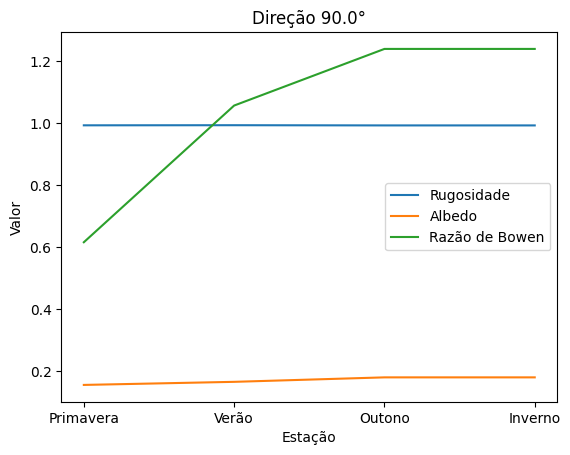

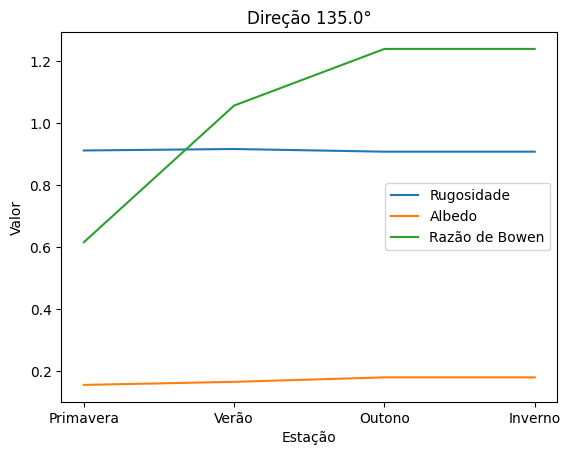

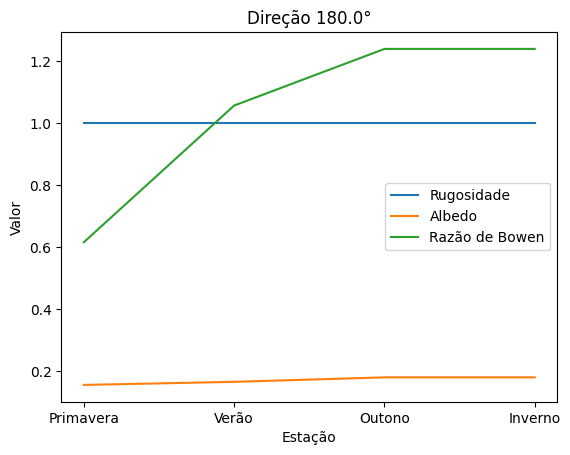

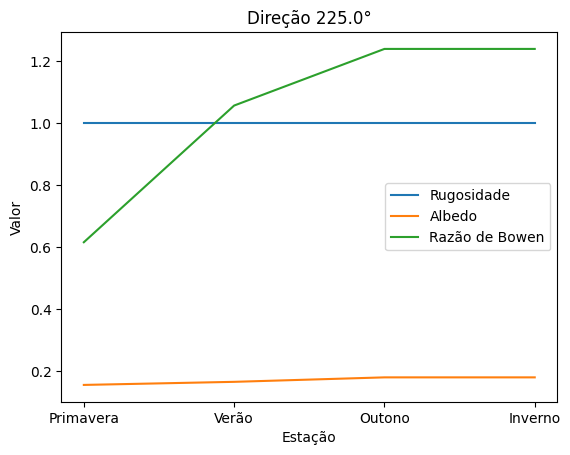

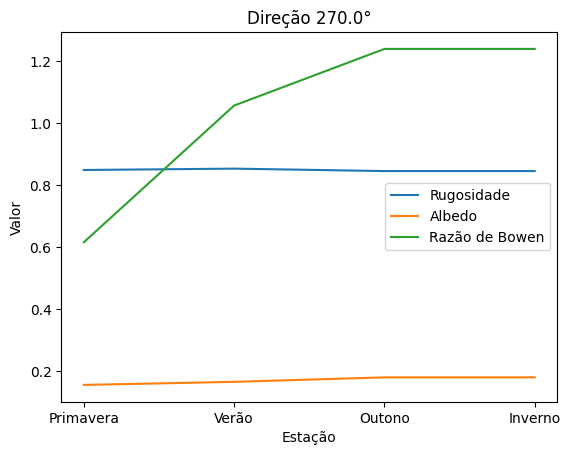

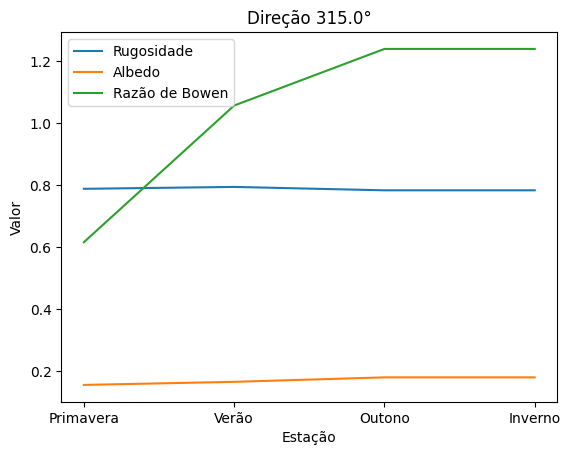

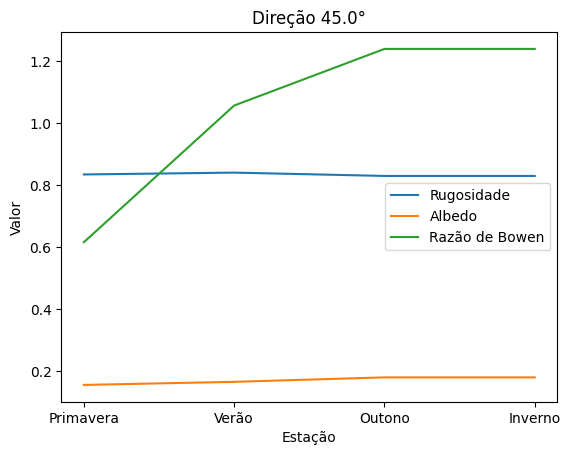

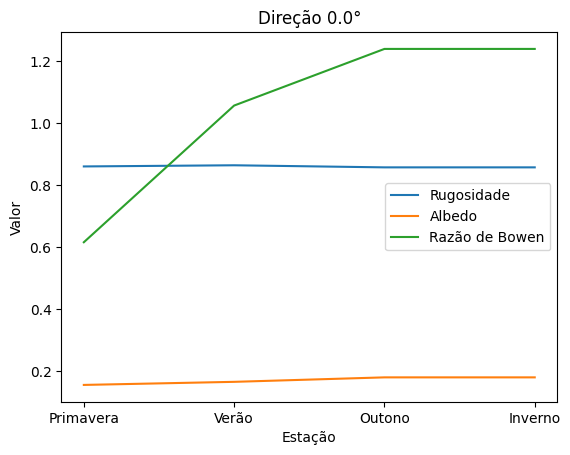

In [397]:
# Análise bowen, rugosidade e albedo para cada quadrante

df_quadrantes = pd.read_csv(caminho+'\\landUseCharSANTACATARINA.csv')

# Iterando sobre as linhas do DataFrame
for index, row in df_quadrantes.iterrows():
    # Criando uma nova figura para cada linha
    plt.figure()
    
    # Plotando os valores de z0, alb e bo para a linha atual
    plt.plot(['Primavera', 'Verão', 'Outono', 'Inverno'], [row['z0_spring'], row['z0_summer'], row['z0_autumn'], row['z0_winter']], label='Rugosidade')
    plt.plot(['Primavera', 'Verão', 'Outono', 'Inverno'], [row['alb_spring'], row['alb_summer'], row['alb_autumn'], row['alb_winter']], label='Albedo')
    plt.plot(['Primavera', 'Verão', 'Outono', 'Inverno'], [row['bo_spring'], row['bo_summer'], row['bo_autumn'], row['bo_winter']], label='Razão de Bowen')
    
    # Adicionando título e legendas
    plt.title('Direção ' + str(row['Sectors']) + '°')
    plt.xlabel('Estação')
    plt.ylabel('Valor')
    plt.legend()
    
    # Exibindo o gráfico
    plt.show()


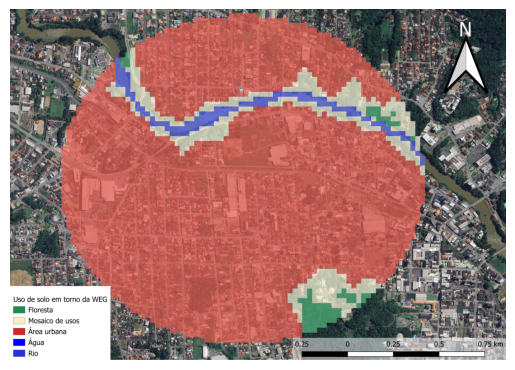

In [400]:
# Apresentando imagem de satélite

import matplotlib.image as mpimg

# Carregar a imagem
img = mpimg.imread('C:\\Users\\joseh\\Documents\\GitHub\\ENS5173_202401\\figures\WEG.png')

# Exibir a imagem
plt.imshow(img)
plt.axis('off')  # Desativar os eixos
plt.show()